In [1]:
!mkdir -p /content/dataset  # Tạo thư mục đích nếu chưa có


In [3]:
!curl -L -o human-detection-yolo.zip https://www.kaggle.com/api/v1/datasets/download/hillsworld/human-detection-yolo


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 6381M  100 6381M    0     0   107M      0  0:00:59  0:00:59 --:--:--  122M


In [4]:
!unzip human-detection-yolo.zip -d dataset/


Streaming output truncated to the last 5000 lines.
  inflating: dataset/Final Dataset(2)/valid/labels/120192_jpg.rf.d811ec82c525151fb3f6917e941f1220.txt  
  inflating: dataset/Final Dataset(2)/valid/labels/120197_jpg.rf.cca99b3267b427453043d0b96176d52b.txt  
  inflating: dataset/Final Dataset(2)/valid/labels/120198_jpg.rf.fbc59788f5ccd7dc0e2b600ed228eb22.txt  
  inflating: dataset/Final Dataset(2)/valid/labels/120203_jpg.rf.adc453775a20a78746998992e7d5a675.txt  
  inflating: dataset/Final Dataset(2)/valid/labels/120205_jpg.rf.998cb67760714822ca4e89c4ef1cfbd4.txt  
  inflating: dataset/Final Dataset(2)/valid/labels/120214_jpg.rf.2b137e357795eb780ada0491cb3caf20.txt  
  inflating: dataset/Final Dataset(2)/valid/labels/120215_jpg.rf.d316964ba76c5cbdf420a97b99ea0933.txt  
  inflating: dataset/Final Dataset(2)/valid/labels/120218_jpg.rf.973a2b39cac178bdcf262ea2d2049c8d.txt  
  inflating: dataset/Final Dataset(2)/valid/labels/120228_jpg.rf.ffd140abeb0cfd30b64d4a184807e90f.txt  
  inflating: 

In [ ]:
# Khi tải về  hãy đổi tên thư mục Final Dataset(2) thành HumanDetection cho chuẩn hóa
# Sau đố cập nhật lại đường dẫn trong /content/dataset/HumanDetection/data.yaml
# Chuyển thành
# train: /content/dataset/HumanDetection/train/images ( cập nhật đến thư mục ảnh của tập train)
# val: /content/dataset/HumanDetection/valid/images( cập nhật đến thư mục ảnh của tập val)


# nc: 1
# names: ['Person']



In [6]:
import os
import random

# Danh sách các tập dữ liệu (train, valid, test)
dataset_dirs = ["train", "valid", "test"]

# Đường dẫn thư mục gốc chứa dữ liệu
base_dir = "/content/dataset/HumanDetection"  # 🔹 Thay bằng đường dẫn thực tế

# Xử lý từng tập dữ liệu
for dataset in dataset_dirs:
    image_dir = os.path.join(base_dir, dataset, "images")
    label_dir = os.path.join(base_dir, dataset, "labels")

    # Lấy danh sách file ảnh (.jpg, .png)
    images = [f for f in os.listdir(image_dir) if f.endswith((".jpg", ".png"))]

    # Chỉ giữ lại 25% số ảnh
    num_keep = int(0.1 * len(images))
    selected_images = set(random.sample(images, num_keep))

    # Xóa ảnh và nhãn không được chọn
    for img in images:
        img_path = os.path.join(image_dir, img)
        lbl_path = os.path.join(label_dir, img.replace(".jpg", ".txt").replace(".png", ".txt"))

        if img not in selected_images:
            os.remove(img_path)  # Xóa ảnh
            if os.path.exists(lbl_path):
                os.remove(lbl_path)  # Xóa file nhãn nếu có

    print(f"✅ Giữ lại {num_keep}/{len(images)} ảnh trong {dataset}")

print("🎯 Hoàn thành! Dữ liệu đã giảm xuống 25%.")


✅ Giữ lại 2005/20054 ảnh trong train
✅ Giữ lại 678/6781 ảnh trong valid
✅ Giữ lại 110/1100 ảnh trong test
🎯 Hoàn thành! Dữ liệu đã giảm xuống 25%.


In [5]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 976.9/976.9 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [2]:
import torch
print("GPU có hoạt động không?", torch.cuda.is_available())
print("Tên GPU:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "Không có GPU")


GPU có hoạt động không? True
Tên GPU: Tesla T4


In [1]:
cd /content/dataset/HumanDetection

/content/dataset/HumanDetection


In [ ]:
!rm -rf /content/dataset/HumanDetection/runs


In [2]:
from ultralytics import YOLO

# Load model YOLO11 (chỉnh lại tên model nếu khác)
model = YOLO("yolo11n.pt")  # Hoặc yolo11s.pt, yolo11m.pt nếu GPU đủ mạnh

# Huấn luyện với tối ưu cho T4 GPU
results = model.train(
    data="data.yaml",  # Đường dẫn đến file dataset.yaml
    epochs=50,            # Tối ưu cho T4 GPU, không quá nặng
    imgsz=640,            # Kích thước ảnh (không nên cao hơn trên T4)
    batch=8,              # Batch nhỏ do RAM GPU hạn chế
    device="cuda",        # Chạy trên GPU
    workers=2,            # Sử dụng ít worker để tránh nghẽn CPU
    patience=5,           # Dừng sớm nếu không cải thiện sau 5 epochs
    optimizer="AdamW",    # Tối ưu hóa nhanh hơn trên GPU
    lr0=0.002,            # Tăng tốc độ học nhẹ
    cos_lr=True,          # Dùng Cosine Learning Rate Decay
    cache=True,           # Dùng cache để tăng tốc load dữ liệu
    dropout=0.05          # Giảm overfitting
)

model.val()

Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=data.yaml, epochs=50, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=True, device=cuda, workers=2, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.05, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=N

train: Scanning /content/dataset/HumanDetection/train/labels... 2005 images, 181 backgrounds, 0 corrupt: 100%|██████████| 2005/2005 [00:05<00:00, 337.32it/s]

train: New cache created: /content/dataset/HumanDetection/train/labels.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (1.8GB RAM): 100%|██████████| 2005/2005 [00:14<00:00, 138.07it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/dataset/HumanDetection/valid/labels... 678 images, 38 backgrounds, 0 corrupt: 100%|██████████| 678/678 [00:02<00:00, 324.04it/s]

val: New cache created: /content/dataset/HumanDetection/valid/labels.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.6GB RAM): 100%|██████████| 678/678 [00:06<00:00, 109.59it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: AdamW(lr=0.002, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.66G      1.545       1.72      1.467         25        640: 100%|██████████| 251/251 [00:46<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:06<00:00,  6.83it/s]


                   all        678       2256      0.278       0.24      0.185     0.0767

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.68G      1.454      1.393      1.416         50        640: 100%|██████████| 251/251 [00:41<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.50it/s]


                   all        678       2256      0.359       0.32      0.238        0.1

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       1.7G      1.415      1.332      1.398         24        640: 100%|██████████| 251/251 [00:40<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:05<00:00,  8.43it/s]


                   all        678       2256       0.42       0.32      0.261      0.111

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       1.7G      1.337      1.243      1.353         62        640: 100%|██████████| 251/251 [00:39<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.38it/s]

                   all        678       2256      0.382      0.358      0.262      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.72G      1.241       1.14      1.305         41        640: 100%|██████████| 251/251 [00:39<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:05<00:00,  8.25it/s]

                   all        678       2256      0.432      0.333      0.303      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.87G      1.194      1.071      1.273         31        640: 100%|██████████| 251/251 [00:39<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.95it/s]

                   all        678       2256      0.458      0.336      0.304      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.88G      1.133      1.002       1.24         50        640: 100%|██████████| 251/251 [00:39<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:05<00:00,  7.85it/s]

                   all        678       2256       0.48       0.32      0.301      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       1.9G      1.095     0.9605      1.216         55        640: 100%|██████████| 251/251 [00:39<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.85it/s]


                   all        678       2256      0.424      0.346      0.306      0.138

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.91G      1.044     0.9078      1.187         53        640: 100%|██████████| 251/251 [00:39<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:05<00:00,  8.16it/s]

                   all        678       2256      0.459      0.358      0.331      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.93G      1.025     0.8904      1.181         52        640: 100%|██████████| 251/251 [00:39<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.86it/s]

                   all        678       2256      0.476      0.347      0.307      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.08G     0.9872     0.8526      1.161         22        640: 100%|██████████| 251/251 [00:39<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:05<00:00,  8.22it/s]

                   all        678       2256      0.498      0.375      0.351      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.08G     0.9643     0.8465      1.144         52        640: 100%|██████████| 251/251 [00:39<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.76it/s]

                   all        678       2256      0.459      0.366      0.329      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.11G     0.9192     0.7914      1.126         24        640: 100%|██████████| 251/251 [00:39<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  8.75it/s]

                   all        678       2256      0.486      0.381      0.346       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.12G     0.8929     0.7717      1.106         39        640: 100%|██████████| 251/251 [00:39<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.79it/s]

                   all        678       2256      0.477      0.383      0.356      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.14G     0.8849     0.7615      1.108         54        640: 100%|██████████| 251/251 [00:40<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.34it/s]

                   all        678       2256      0.489       0.36      0.343      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       2.3G     0.8646     0.7481      1.093         19        640: 100%|██████████| 251/251 [00:39<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.19it/s]

                   all        678       2256      0.487      0.403      0.374      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.31G     0.8537     0.7264       1.09         35        640: 100%|██████████| 251/251 [00:40<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.70it/s]

                   all        678       2256       0.48      0.418      0.365      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.33G     0.8084     0.7055      1.075         30        640: 100%|██████████| 251/251 [00:39<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:05<00:00,  8.18it/s]

                   all        678       2256      0.461      0.383      0.354      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.34G     0.8117     0.6878      1.063         46        640: 100%|██████████| 251/251 [00:39<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.63it/s]

                   all        678       2256      0.481       0.41      0.375      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.35G     0.7923     0.6698      1.063         30        640: 100%|██████████| 251/251 [00:39<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:05<00:00,  8.11it/s]

                   all        678       2256       0.54      0.379      0.373      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.37G     0.7835     0.6698      1.057         30        640: 100%|██████████| 251/251 [00:39<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.60it/s]

                   all        678       2256      0.504      0.401      0.385      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.39G     0.7502     0.6402      1.037         31        640: 100%|██████████| 251/251 [00:39<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:05<00:00,  8.23it/s]

                   all        678       2256      0.517      0.411      0.392      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       2.4G      0.741     0.6307      1.039         29        640: 100%|██████████| 251/251 [00:39<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.74it/s]

                   all        678       2256      0.493      0.413      0.388      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.42G      0.746     0.6358      1.034         43        640: 100%|██████████| 251/251 [00:39<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:05<00:00,  8.27it/s]

                   all        678       2256       0.53      0.414      0.401      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.44G     0.7239     0.6134      1.025         16        640: 100%|██████████| 251/251 [00:39<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.84it/s]

                   all        678       2256      0.544      0.401      0.405      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.45G     0.7098     0.6011      1.016         19        640: 100%|██████████| 251/251 [00:39<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:05<00:00,  8.23it/s]

                   all        678       2256      0.526      0.414      0.397      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.46G     0.7099     0.5966       1.02         42        640: 100%|██████████| 251/251 [00:39<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.45it/s]

                   all        678       2256      0.497      0.441       0.41      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.47G     0.6923     0.5853      1.007         33        640: 100%|██████████| 251/251 [00:39<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:05<00:00,  8.29it/s]

                   all        678       2256      0.533      0.411        0.4      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.49G     0.6795     0.5721      1.011         48        640: 100%|██████████| 251/251 [00:39<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.72it/s]

                   all        678       2256      0.517       0.44      0.413      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.51G      0.658     0.5546     0.9969         22        640: 100%|██████████| 251/251 [00:39<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:05<00:00,  8.44it/s]

                   all        678       2256      0.514      0.431      0.414      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.52G     0.6407     0.5469     0.9896         22        640: 100%|██████████| 251/251 [00:39<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.90it/s]

                   all        678       2256       0.53       0.45      0.433      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.54G     0.6561     0.5538     0.9973         25        640: 100%|██████████| 251/251 [00:40<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  8.99it/s]

                   all        678       2256       0.52      0.454       0.43      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.55G     0.6353     0.5451      0.994         49        640: 100%|██████████| 251/251 [00:39<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.96it/s]

                   all        678       2256      0.525      0.445      0.423      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.57G     0.6187     0.5274       0.98         86        640: 100%|██████████| 251/251 [00:40<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.07it/s]

                   all        678       2256      0.537      0.441      0.437      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.58G     0.6172      0.525     0.9801         40        640: 100%|██████████| 251/251 [00:39<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.60it/s]


                   all        678       2256      0.544      0.431       0.43      0.222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.59G     0.6107     0.5131     0.9755         38        640: 100%|██████████| 251/251 [00:39<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.08it/s]

                   all        678       2256       0.55      0.441      0.427      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.62G     0.5959       0.51     0.9729         15        640: 100%|██████████| 251/251 [00:39<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.72it/s]

                   all        678       2256      0.565      0.433      0.439      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.62G     0.5819     0.4928     0.9646         35        640: 100%|██████████| 251/251 [00:40<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.20it/s]

                   all        678       2256      0.547      0.453      0.445      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.64G     0.5895     0.5076     0.9727         55        640: 100%|██████████| 251/251 [00:39<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.96it/s]

                   all        678       2256      0.541      0.461       0.45      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.65G     0.5557     0.4792     0.9583         91        640: 100%|██████████| 251/251 [00:39<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.24it/s]


                   all        678       2256      0.573      0.454      0.455       0.24
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.67G      1.574       1.48      1.543         12        640: 100%|██████████| 251/251 [00:39<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.69it/s]

                   all        678       2256      0.563       0.45      0.458      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.69G      1.492      1.341      1.466         26        640: 100%|██████████| 251/251 [00:38<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:05<00:00,  8.28it/s]

                   all        678       2256      0.574      0.456      0.473      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50       2.7G      1.488      1.332      1.452          4        640: 100%|██████████| 251/251 [00:38<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.69it/s]

                   all        678       2256       0.57      0.452      0.468       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.71G      1.458      1.276      1.438          9        640: 100%|██████████| 251/251 [00:38<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:05<00:00,  8.10it/s]


                   all        678       2256      0.588      0.472      0.489      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.73G      1.436      1.261      1.422         15        640: 100%|██████████| 251/251 [00:38<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.71it/s]

                   all        678       2256      0.585      0.472       0.49      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.75G      1.446      1.268      1.424         16        640: 100%|██████████| 251/251 [00:38<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.06it/s]

                   all        678       2256      0.586      0.476       0.49      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.76G      1.427      1.237      1.414          9        640: 100%|██████████| 251/251 [00:38<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.38it/s]

                   all        678       2256      0.612      0.463      0.494      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.77G      1.412      1.223      1.407         17        640: 100%|██████████| 251/251 [00:37<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.92it/s]

                   all        678       2256      0.594      0.471      0.493      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.79G      1.406      1.214      1.403         17        640: 100%|██████████| 251/251 [00:37<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:05<00:00,  8.07it/s]


                   all        678       2256      0.609      0.465      0.496      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       2.8G      1.407       1.21        1.4          6        640: 100%|██████████| 251/251 [00:38<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:04<00:00,  9.82it/s]

                   all        678       2256      0.603      0.471      0.497      0.268



50 epochs completed in 0.622 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:06<00:00,  6.70it/s]


                   all        678       2256      0.603      0.471      0.497      0.268
Speed: 0.3ms preprocess, 2.4ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train2
Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/dataset/HumanDetection/valid/labels.cache... 678 images, 38 backgrounds, 0 corrupt: 100%|██████████| 678/678 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.6GB RAM): 100%|██████████| 678/678 [00:06<00:00, 106.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:06<00:00, 13.31it/s]


                   all        678       2256      0.611      0.467      0.496      0.269
Speed: 0.4ms preprocess, 4.5ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train22


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79bec246a010>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 


image 1/1 /content/test.jpg: 480x640 2 Persons, 72.3ms
Speed: 2.9ms preprocess, 72.3ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


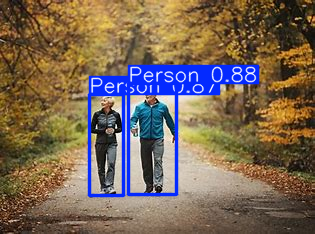

In [ ]:
from ultralytics import YOLO

# Load mô hình
from ultralytics import YOLO
from PIL import Image

# Load mô hình YOLO
model = YOLO("/content/dataset/HumanDetection/runs/detect/train/weights/best.pt")

# Đọc ảnh đầu vào
image_path = "/content/test.jpg"

# Chạy mô hình để dự đoán
results = model(image_path)

# Hiển thị kết quả
results[0].show()  # Lấy phần tử đầu tiên trong list

